In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath('__file__')), '..')) # Modify the working path so that this.ipynb file can import other modules like in the root directory


In [2]:
path=r"E:\PythonProjects\gas-data-prediction\results20250217\experiment_1739792972_LR\objects.pkl" # Your objects.pkl path

with open(path, 'rb') as f:
    object_pkl_dict = pickle.load(f)
print(object_pkl_dict.keys())

dict_keys(['model', 'Y_pred', 'Y_true', 'input_var_names', 'input_var_units', 'input_var_mean', 'input_var_std_dev', 'output_var_names', 'output_var_mean', 'output_var_std_dev', 'output_var_units', 'args', 'nargs', 'Metadata'])


In [3]:
# load the objects
model = object_pkl_dict["model"]
Y_pred = object_pkl_dict["Y_pred"]
Y_true = object_pkl_dict["Y_true"]
output_var_names = object_pkl_dict["output_var_names"]
output_var_units = object_pkl_dict["output_var_units"]
output_var_mean = object_pkl_dict["output_var_mean"]
output_var_std_dev = object_pkl_dict["output_var_std_dev"]

print("Y_pred.shape:", Y_pred.shape)
print("Y_true.shape:", Y_true.shape)
print("output_var_names:", output_var_names)
print("output_var_units:", output_var_units)
print("output_var_mean:", output_var_mean)
print("output_var_std_dev:", output_var_std_dev)



Y_pred.shape: (880, 2)
Y_true.shape: (880, 2)
output_var_names: ['NOx', 'Smoke_Temperature']
output_var_units: ['mg/m3', '℃']
output_var_mean: [36.70479317 29.27388112]
output_var_std_dev: [5.70806665 0.58140244]


In [4]:
from utils.model_test import ModelTest
Exp=ModelTest(model=model, device="cpu") # Experiment object initialization

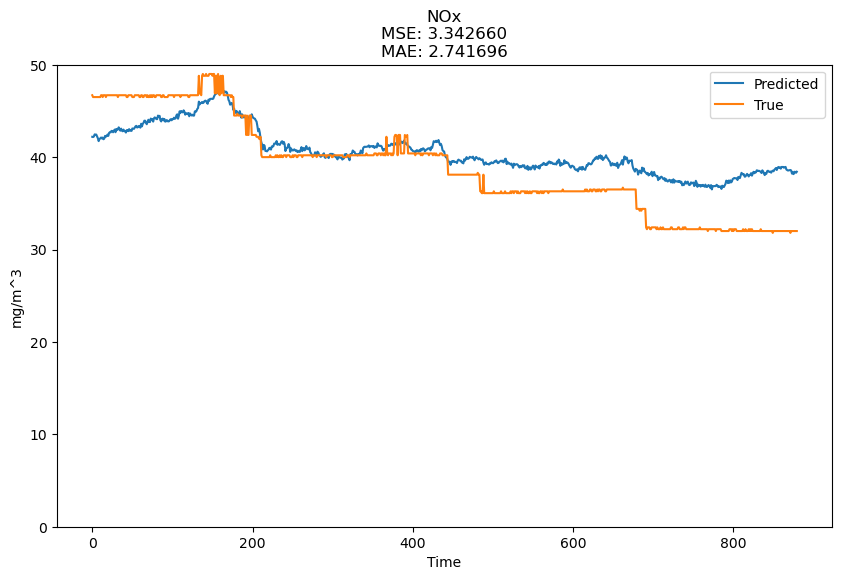

In [5]:
var_idx=0
var_mean = output_var_mean[var_idx] # scalar
var_std_dev = output_var_std_dev[var_idx] # scalar

y_pred = Y_pred[:, var_idx]
y_true = Y_true[:, var_idx]

RMSE = np.sqrt(((y_pred - y_true) ** 2).mean())
MAE = np.abs(y_pred - y_true).mean()
RMSE_rescaled = RMSE * var_std_dev
MAE_rescaled = MAE * var_std_dev

y_pred_rescaled = y_pred * var_std_dev + var_mean
y_true_rescaled = y_true * var_std_dev + var_mean

plt.figure(figsize=(10, 6))
plt.title("NOx\nMSE: {:.6f}\nMAE: {:.6f}".format(RMSE_rescaled, MAE_rescaled))
plt.ylim(0, 50)
plt.plot(y_pred_rescaled, label='Predicted')
plt.plot(y_true_rescaled, label='True')
plt.xlabel('Time')
plt.ylabel('mg/m^3')
plt.legend()
plt.show()

